In [1]:
#Import modules
import pandas as pd
import csv
import numpy as np
import cartopy
import matplotlib.pyplot as plt
from metpy.plots import USCOUNTIES

In [19]:
#Define  filepath variables to be used later for reading/writing files
user = ''
directory = '\\\\isgs-sinkhole.ad.uillinois.edu\\geophysics\\Balikian\\ISWS_HydroGeo\\MetroEast_HydroGeo\\WellData\\'
wells_filename = 'ESL_Wells_DescriptionsAndXYZ_All.txt'
wellLocs_filename = 'ESL_Wells_DescriptionsAndXYZ.txt'
encodeType = 'latin1'

In [22]:
#Read in well description data to pandas dataframe
wells = pd.read_csv(directory+wells_filename, sep=',', header='infer', encoding=encodeType, usecols=['ID', 'API_Number','Latitude_C', 'LongitudeC', 'RASTERVALU', 'TOP', 'BOTTOM', 'FORMATION_SHORT', 'LITHOLOGY', 'COLOR', 'CONSISTENCY','MOD1','MOD2','INTERPRETED', 'COMPLETED']) #Not working for whatever reason, so use below code
wells.columns = ['ID', 'API_Number', 'Latitude', 'Longitude', 'Surface_Elev_ft', 'Top', 'Bottom', 'Description', 'Lithology', 'Color' ,'Consistency', 'Modifier1', 'Modifier2', 'Intepreted Lithology', 'Completed']
wells

,ID,API_Number,Latitude,Longitude,Surface_Elev_ft,Top,Bottom,Description,Lithology,Color,Consistency,Modifier1,Modifier2,Intepreted Lithology,Completed
0,16875,1.213323e+11,38.448236,-90.227937,506.161011,0.0,20.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0
1,97262,1.213322e+11,38.448212,-90.225553,467.864014,0.0,67.0,dirt,DIRT,NaN,NaN,NaN,NaN,SOIL,1.0
2,667,1.213300e+11,38.445277,-90.205513,466.548004,0.0,64.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0
3,16918,1.213321e+11,38.451764,-90.211163,494.658997,0.0,56.0,overburden,DRIFT,NaN,NaN,NaN,NaN,GENERIC,1.0
4,152475,1.213323e+11,38.440691,-90.204281,501.755005,0.0,30.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,78242,1.211924e+11,38.950363,-90.051830,509.119995,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0
4747,78433,1.211925e+11,38.950363,-90.051830,509.119995,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0
4748,78675,1.211925e+11,38.950293,-90.056630,518.526978,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0
4749,187291,1.211928e+11,38.956834,-90.063371,487.769012,0.0,10.0,lowest 4 to 5 feet is coal (Herrin #6) and upp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#No longer needed. Used for work around when Pandas read-in wasn't working due to encoding issue
#wellData = []
#with open(directory+wells_filename) as wellFile:
#    wells = csv.reader(wellFile, delimiter=',')
#    for row in wells:
#        wellData.append(row)
#cols = wellData[0]
#del wellData[0]
#wells = pd.DataFrame(wellData)
#wells.columns = cols
#wells

In [23]:
#Read in well location data to pandas dataframe
#wellLocs = pd.read_csv(directory+wellLocs_filename, sep=',')
#wellLocs

In [24]:
#Recast API Number column as floats for size and to ensure they match between dataframes
wells['API_Number'] = wells['API_Number'].astype(float)
#wellLocs['API_Number'] = wellLocs['API_Number'].astype(float)

In [25]:
#Merge the two dataframe to get descriptions and locations into one dataframe
#wellswithLocs = wells.merge(wellLocs, how='inner', on='API_Number')

In [28]:
#Replace empty cells in top/bottom columns with nans to aid later processing
wells['Top'] = wells['Top'].replace('', np.nan)
wells['Bottom'] = wells['Bottom'].replace('', np.nan)

In [29]:
#Convert necessary columns to float
wells['Top'] = wells['Top'].astype(float)
wells['Bottom'] = wells['Bottom'].astype(float)

wells['Latitude'] = wells['Latitude'].astype(float)
wells['Longitude'] = wells['Longitude'].astype(float)

In [30]:
#Get well interval elevations in feet from surface elevation depth
wells['Top_Elev_ft'] = wells['Surface_Elev_ft'] - wells['Top']
wells['Bot_Elev_ft'] = wells['Surface_Elev_ft'] - wells['Bottom']

In [31]:
#Quality Checks
#View new dataframe
wells

,ID,API_Number,Latitude,Longitude,Surface_Elev_ft,Top,Bottom,Description,Lithology,Color,Consistency,Modifier1,Modifier2,Intepreted Lithology,Completed,Top_Elev_ft,Bot_Elev_ft
0,16875,1.213323e+11,38.448236,-90.227937,506.161011,0.0,20.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0,506.161011,486.161011
1,97262,1.213322e+11,38.448212,-90.225553,467.864014,0.0,67.0,dirt,DIRT,NaN,NaN,NaN,NaN,SOIL,1.0,467.864014,400.864014
2,667,1.213300e+11,38.445277,-90.205513,466.548004,0.0,64.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0,466.548004,402.548004
3,16918,1.213321e+11,38.451764,-90.211163,494.658997,0.0,56.0,overburden,DRIFT,NaN,NaN,NaN,NaN,GENERIC,1.0,494.658997,438.658997
4,152475,1.213323e+11,38.440691,-90.204281,501.755005,0.0,30.0,yellow clay,CLAY,YELLOW,NaN,NaN,NaN,CLAY,1.0,501.755005,471.755005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,78242,1.211924e+11,38.950363,-90.051830,509.119995,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0,509.119995,506.119995
4747,78433,1.211925e+11,38.950363,-90.051830,509.119995,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0,509.119995,506.119995
4748,78675,1.211925e+11,38.950293,-90.056630,518.526978,0.0,3.0,top soil,SOIL,NaN,NaN,NaN,NaN,SOIL,1.0,518.526978,515.526978
4749,187291,1.211928e+11,38.956834,-90.063371,487.769012,0.0,10.0,lowest 4 to 5 feet is coal (Herrin #6) and upp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487.769012,477.769012


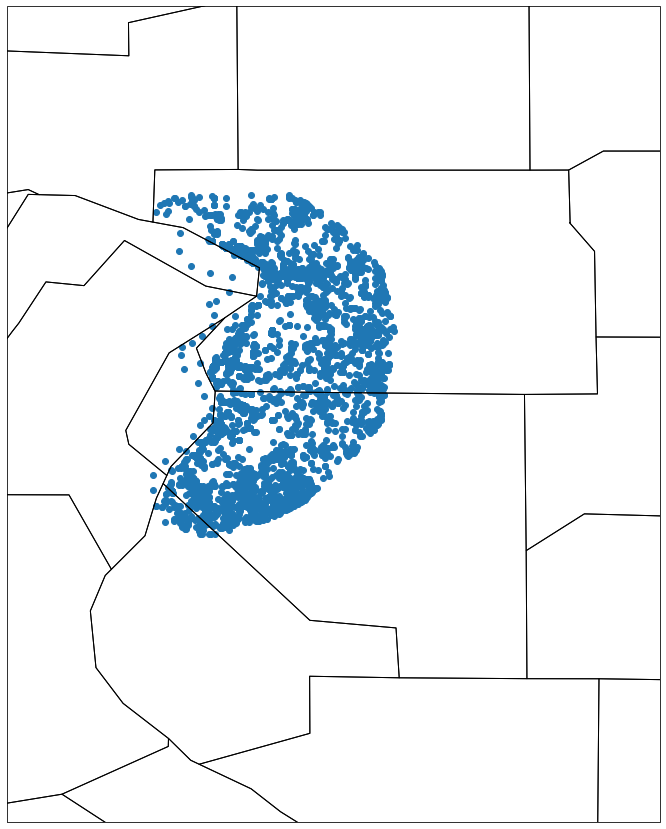

In [35]:
#Chart data 
proj = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(1, figsize=(15,15), subplot_kw=dict(projection=proj))
ax.scatter(wells['Longitude'], wells['Latitude'])
#ax.add_feature(cartopy.feature.STATES)
ax.add_feature(USCOUNTIES)
ax.set_extent([-90.5,-89.5,38,39.25])

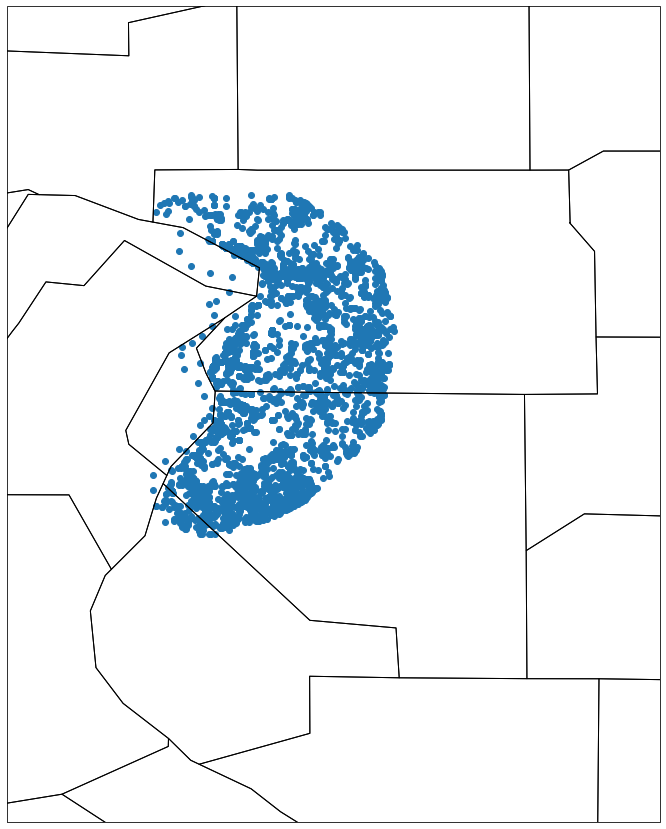

In [37]:
#Chart data 
proj = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(1, figsize=(15,15), subplot_kw=dict(projection=proj))
ax.scatter(wells['Longitude'], wells['Latitude'])
#ax.add_feature(cartopy.feature.STATES)
ax.add_feature(USCOUNTIES)
ax.set_extent([-90.5,-89.5,38,39.25])

In [38]:
#Export data to new data frame
wells.to_csv(directory+'ESL_Wells_All.txt')